In [3]:
import numpy as np
import pandas as pd
from reco_systems.filter import filter_df
from reco_systems.user_game_matrix import *
from reco_systems.CF_knn import *
import seaborn as sns
from reco_systems.evaluation import *
from scipy.sparse import dok_array, lil_array

%load_ext autoreload
%autoreload 2

In [4]:
folder = "database_cleaned"
avis_clean = pd.read_csv(f"database_cleaned/avis_clean.csv", index_col=0)
jeux_clean = pd.read_csv(f"database_cleaned/jeux_clean.csv", index_col=0)
users = pd.read_csv(f"trictrac_database/users.csv", names=["Username", "User id"])

min_reviews = 5

In [5]:
rev_filter = filter_df(avis_clean, min_reviews)

11201 10549
3242 3957
3006 3910
3003 3910


In [6]:
matrix_ratings, mask_ratings, users_table_assoc, games_table_assoc = get_matrix_user_game(rev_filter)
mask_ratings

<Compressed Sparse Row sparse array of dtype 'float64'
	with 113446 stored elements and shape (3003, 3910)>

In [7]:
similarity_matrix, _ = calc_similarity_matrix(matrix_ratings, mask_ratings, "cos")
type(similarity_matrix)

numpy.ndarray

In [8]:
calc_RMSE_cos_vector = np.vectorize(calc_RMSE_cos, excluded=["matrix_ratings", "mask_ratings", "similarity_matrix"])
users_count = rev_filter[["User id", "Game id"]].groupby("User id", as_index=True).count().sort_values(by="Game id", ascending=False).head(50)
users = users_table_assoc[users_table_assoc.isin(users_count.index)].index.to_numpy()
users_count

,Game id
User id,
208,1337
1,970
83,921
91,764
201,702
1724,654
1936,574
2,470
1998,452


In [9]:
users = np.array([0])
vect_rmse = np.vectorize(calc_RMSE_cos, excluded=['matrix_ratings', 'mask_ratings', 'similarity_matrix'])
result = vect_rmse(users, matrix_ratings=matrix_ratings, mask_ratings=mask_ratings, similarity_matrix=similarity_matrix)

In [49]:
rmse_users = pd.DataFrame(zip(users_table_assoc[users], result), columns=["User id", "RMSE"]).merge(users_count, on ="User id")
rmse_users.columns = ["User id", "RMSE", "Count reviews"]
rmse_users.sort_values(by="Count reviews", inplace=True)
rmse_users

,User id,RMSE,Count reviews
47,2859,5.618092,272
41,2272,3.448683,274
9,166,2.257221,274
48,2877,2.425255,277
20,638,4.162993,277
2,3,1.924076,279
30,1815,4.142423,281
21,732,5.793271,281
35,1905,3.085957,282
49,2994,4.094940,284


Text(0.5, 0.98, 'Ver. Baseline cos')

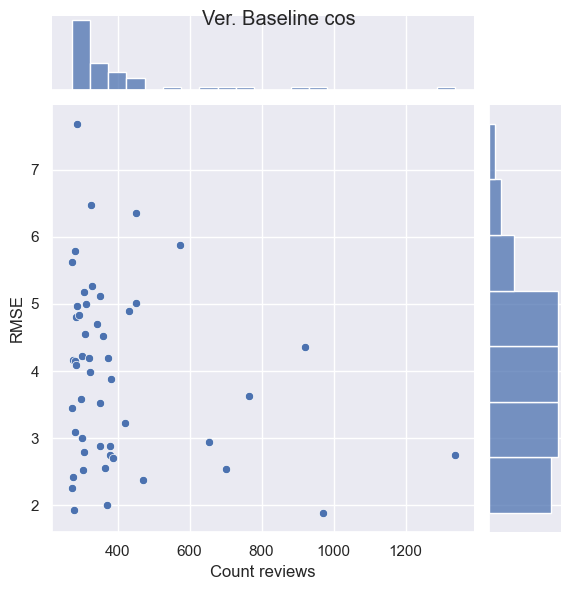

In [50]:
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
n_ticks = 5  # Number of ticks you want to show
ax = sns.jointplot(data=rmse_users, y="RMSE", x="Count reviews")
ax.figure.suptitle("Ver. Baseline cos")
# for ind, label in enumerate(ax.get_xticklabels()):
#     if ind % 10 == 0:  # every 10th label is kept
#         label.set_visible(True)
#     else:
#         label.set_visible(False)